# Ex7: Image compression with Kmeans
We will load an image and compress it. 
In a 24-bit color image each pixel is represented as a 8-bit unsigned integer (from 0 to 255) that specifies red, green and blue intensity values (RGB encoding). This implies thousands of colors. 
Using K-means we will reduce this to 16 colors. We will store the value of each of the 16 selected colors and for each pixel we will just need to store the index of the color at that location. 

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the data

File format: PNG
File size: (128, 128)
File mode: RGB


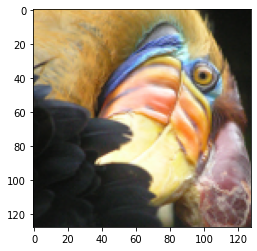

In [4]:
img = Image.open('bird_small.png', 'r')

# identifies the source of an image. If the image was not read from a file, it is set to None
print('File format:', img.format)
# width and height (in pixels)
print('File size:', img.size)
# number and names of the bands in the image, and also the pixel type and depth.
# Common modes are “L” (luminance) for greyscale images, “RGB” for true color images,
# and “CMYK” for pre-press images.
print('File mode:', img.mode)

plt.imshow(np.asarray(img))

We see here that the image is made of 128 x 128 where each data point can be 24-bit (RGB)

In [12]:
np.asarray(img).shape

(128, 128, 3)

## Train the model

In [13]:
# Let's set each RGB color in 
X = np.reshape(np.asarray(img),(np.asarray(img).shape[0]*np.asarray(img).shape[1], np.asarray(img).shape[2]))

In [69]:
colors= 16

knn = KMeans(n_clusters=colors,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
knn.fit(X)

KMeans(n_clusters=16, random_state=0)

In [70]:
# This shows the centroid associated to each training datapoint
knn.labels_

array([1, 1, 1, ..., 6, 6, 6])

In [71]:
knn.cluster_centers_

array([[ 21.73661134,  23.53899154,  20.94393987],
       [220.59894921, 182.11792177, 115.27086982],
       [117.92394015,  99.6084788 ,  90.06608479],
       [249.14210985, 240.8413252 , 207.39755885],
       [178.78054567, 160.5717675 , 142.93594306],
       [110.81881051,  78.93499308,  48.406639  ],
       [ 42.95166163,  42.81873112,  40.54441088],
       [245.41361789, 217.74288618, 158.90142276],
       [191.01579926, 152.11431227,  84.7527881 ],
       [149.86389201, 127.51743532, 114.09111361],
       [211.16528926, 190.38347107, 187.8446281 ],
       [161.76168757, 116.98517674,  51.17673888],
       [ 70.35483871,  67.01612903,  68.8156682 ],
       [ 98.91481481, 117.00740741, 165.2962963 ],
       [233.39877301, 146.18813906,  64.79550102],
       [145.24      , 183.944     , 221.464     ]])

In [72]:
XConverted = np.zeros((np.asarray(img).shape[0]*np.asarray(img).shape[1], np.asarray(img).shape[2]))

# Easier -> XConverted = knn.cluster_centers_[knn.labels_]
for i in range(colors): XConverted[knn.labels_==i]=knn.cluster_centers_[i]

XConv = XConverted.reshape(np.asarray(img).shape[0], np.asarray(img).shape[1], np.asarray(img).shape[2])

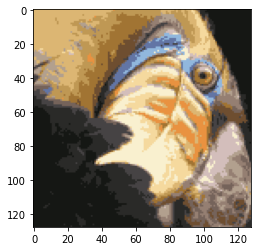

In [73]:
plt.imshow(XConv.astype(int))

## Let's make a function to load any other image

In [110]:
def imageCompress(filenames, colors=16):
    
    knn = KMeans(n_clusters=colors,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    fig, ax = plt.subplots(nrows = len(filenames), ncols = 2, sharex = False, sharey = False, figsize=(15,15))
    
    for id, filename in enumerate(filenames):
        # Load the image and prepare the training dataset
        img = Image.open(filename, 'r')
        X = np.reshape(np.asarray(img),(np.asarray(img).shape[0]*np.asarray(img).shape[1], np.asarray(img).shape[2]))
        # Train the model
        knn.fit(X)
        
        # Create the converted version of the dataset.
        # Kmeans will associate a centroid index to each color. The converted array contains
        # the value of the closest centroid to the color
        XConverted = np.zeros((np.asarray(img).shape[0]*np.asarray(img).shape[1], np.asarray(img).shape[2]))
        XConverted = knn.cluster_centers_[knn.labels_]
        
        # Reshape the array to show the compressed version. 
        # We convert all the values to the closest integer
        XConv = XConverted.reshape(np.asarray(img).shape[0], np.asarray(img).shape[1], np.asarray(img).shape[2])
        XConv = XConv.astype(int)
        
        fig.tight_layout()
        ax[id,0].imshow(np.asarray(img))
        ax[id,1].imshow(XConv)

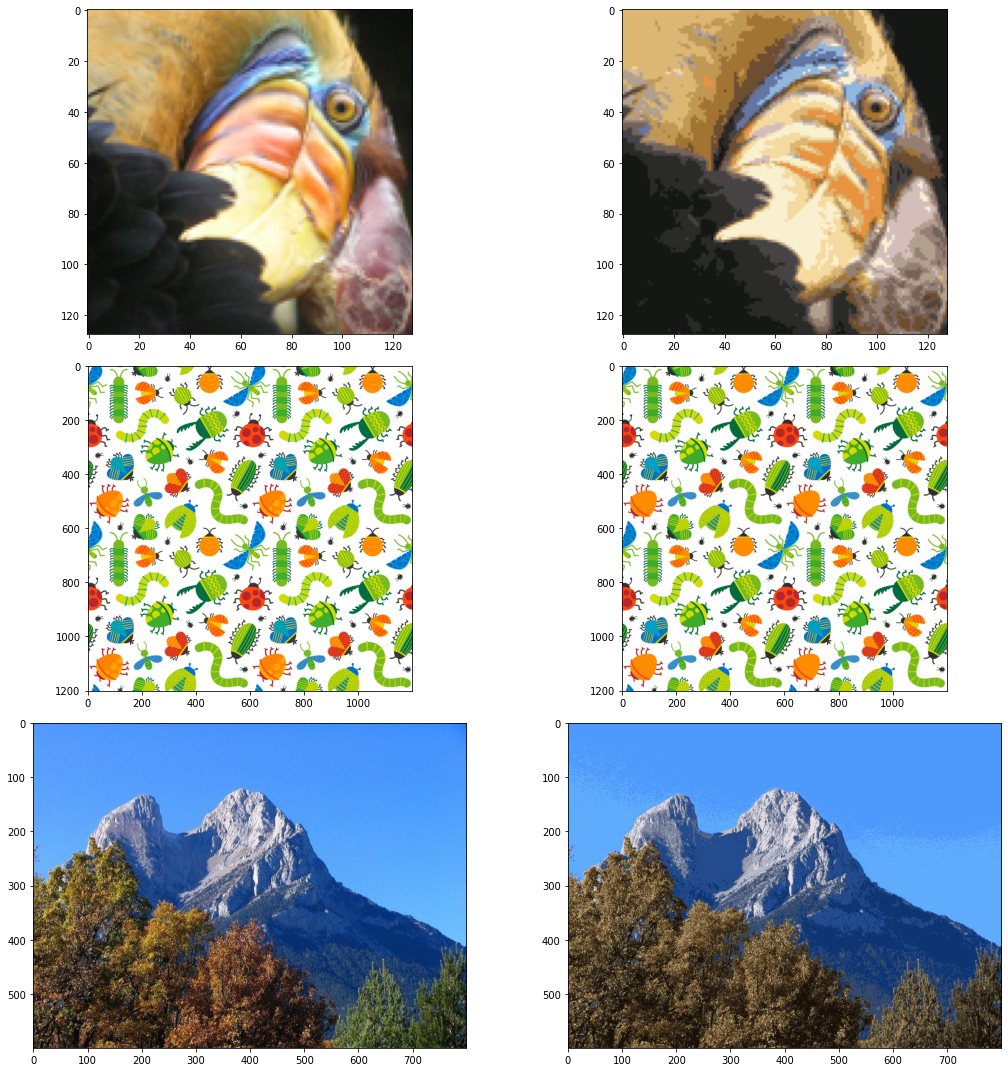

In [111]:
filenames=['bird_small.png', 'Kids pattern.png', 'pedraforca.jpg']
colors = 16
imageCompress(filenames, colors)